<a href="https://colab.research.google.com/github/ANAVDUTT/Using-Reinforcement-Learning-to-predict-crypto-and-the-effect-of-Covid-19/blob/main/Anav_Dutt_final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RL GME Trading**
27 Apr 2021 Jon Chun (modified)

References:

**OpenAI gym-anytrading**
* (github) https://colab.research.google.com/github/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb
* (video) https://www.youtube.com/watch?v=q-Uw9gC3D4o (part 2)

**TensorTrade**
* (RL Trading Tutorial w/TensorTrade.py) https://towardsdatascience.com/trade-smarter-w-reinforcement-learning-a5e91163f315
* (TensorTrade.py doc) https://www.tensortrade.org/en/latest/
* (TensorTrade.py github)
* (TensorTrade.py Discord) https://discord.com/channels/592446624882491402/592446625507704863

**FinRL**
* (tutorial) https://analyticsindiamag.com/stock-market-prediction-using-finrl/

**FinTA (Technical Analysis Library)**
* (repo) https://github.com/peerchemist/finta

# 0. Install and Import dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 412.3MB 45kB/s 
     |████████████████████████████████| 245kB 36.5MB/s 
     |████████████████████████████████| 174kB 42.1MB/s 
     |████████████████████████████████| 51kB 3.5MB/s 
     |████████████████████████████████| 3.8MB 18.2MB/s 
     |████████████████████████████████| 512kB 46.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=96183c47da4be6c40e59d375ee8ae1d99e53f273655c446a03b2a36d15c5d67f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Succes

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving coin_Ethereum.csv to coin_Ethereum.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['coin_Ethereum.csv']))


In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume
0,8/8/15 23:59,2.798810,0.714725,2.793760,0.753325,674188
1,8/9/15 23:59,0.879810,0.629191,0.706136,0.701897,532170
2,8/10/15 23:59,0.729854,0.636546,0.713989,0.708448,405283
3,8/11/15 23:59,1.131410,0.663235,0.708087,1.067860,1463100
4,8/12/15 23:59,1.289940,0.883608,1.058750,1.217440,2150620


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
High             float64
Low              float64
Open             float64
Close            float64
Volume             int64
dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2015-08-08 23:59:00,2.798810,0.714725,2.793760,0.753325,674188
2015-08-09 23:59:00,0.879810,0.629191,0.706136,0.701897,532170
2015-08-10 23:59:00,0.729854,0.636546,0.713989,0.708448,405283
2015-08-11 23:59:00,1.131410,0.663235,0.708087,1.067860,1463100
2015-08-12 23:59:00,1.289940,0.883608,1.058750,1.217440,2150620


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [ ]:
env.signal_features

array([[ 7.53324986e-01,  0.00000000e+00],
       [ 7.01897025e-01, -5.14279610e-02],
       [ 7.08447993e-01,  6.55096800e-03],
       ...,
       [ 1.47570374e+03, -1.50871970e+02],
       [ 1.44603365e+03, -2.96700850e+01],
       [ 1.45997312e+03,  1.39394710e+01]])

# 2. Build Environment

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 1069.1498262379996, 'total_profit': 0.02253480540600661, 'position': 0}


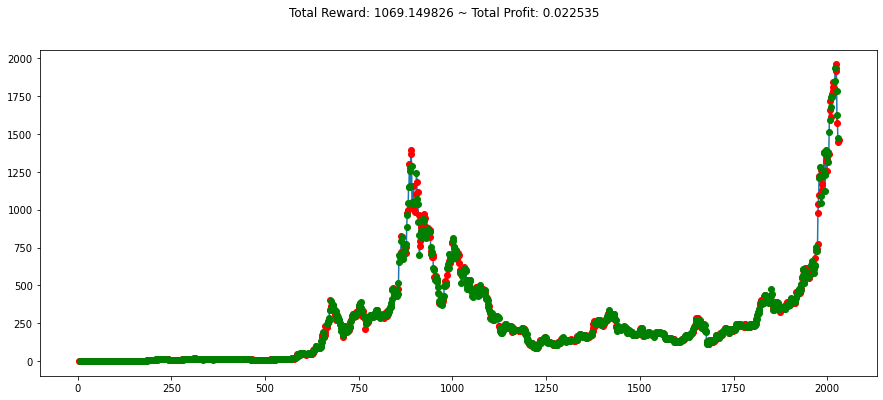

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
%%time 

# BENCHMARKS:  00m24s at 10:42 on 20210521 (10k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (20k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (30k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (40k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (50k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (60k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (70k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (80k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (90k timesteps on orig/default dataset)
#              03m59s at 10:44 on 20210521 (100k timesteps on orig/default dataset)
#              03m59s at 10:50 on 20210521 (200k timesteps on orig/default dataset)
#              03m59s at 10:44 on 20210521 (300k timesteps on orig/default dataset)
#              03m59s at 10:44 on 20210521 (400k timesteps on orig/default dataset)
#              03m59s at 11:44 on 20210521 (500k timesteps on orig/default dataset)

# ~25m for 100k timesteps on default dataset at 10:40 on 20210521 (orig default 1M)


model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=400000)  

Streaming output truncated to the last 5000 lines.
| fps                | 347      |
| nupdates           | 17600    |
| policy_entropy     | 0.0555   |
| total_timesteps    | 88000    |
| value_loss         | 0.000384 |
---------------------------------
---------------------------------
| explained_variance | -34.7    |
| fps                | 347      |
| nupdates           | 17700    |
| policy_entropy     | 0.116    |
| total_timesteps    | 88500    |
| value_loss         | 1.18e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.562   |
| fps                | 347      |
| nupdates           | 17800    |
| policy_entropy     | 0.506    |
| total_timesteps    | 89000    |
| value_loss         | 0.152    |
---------------------------------
---------------------------------
| explained_variance | 0.22     |
| fps                | 347      |
| nupdates           | 17900    |
| policy_entropy     | 0.131    |
| total_timesteps    | 89500   

# 4. Evaluation

In [ ]:
# BENCHMARKS:  00m24s at 10:42 on 20210521 (10k timesteps on orig/default dataset)
#                     info {'total_reward': -1.6099999999999994, 'total_profit': 0.7934090228908001, 'position': 1}
#              00m00s at xx:xx on 20210521 (20k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (30k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (40k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (50k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (60k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (70k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (80k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (90k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              03m59s at 10:44 on 20210521 (100k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 10:50 on 20210521 (200k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 10:44 on 20210521 (300k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 11:44 on 20210521 (400k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 10:44 on 20210521 (500k timesteps on orig/default dataset)
#                     info {'total_reward': -1.4299999999999997, 'total_profit': 0.8195451928327132, 'position': 0}


env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.9166497644048184, 'position': 1}


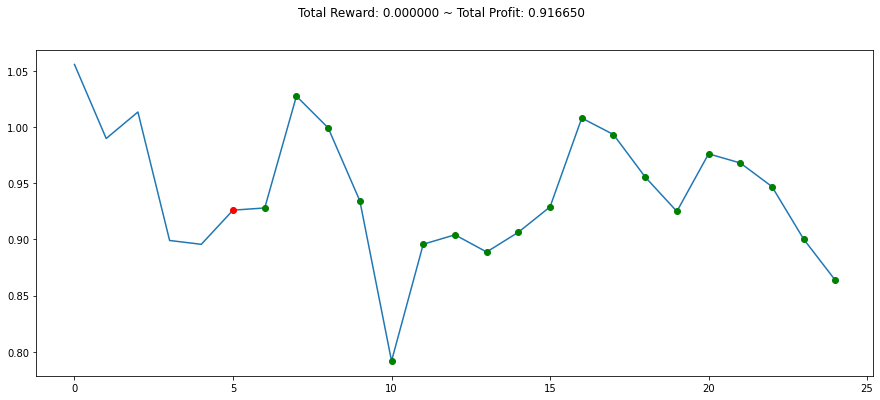

In [ ]:
# BENCHMARKS:  00m24s at 10:42 on 20210521 (10k timesteps on orig/default dataset)
#                     Total Reward: -1.610000 ~ Total Profit: 0.793409
#              03m59s at 10:44 on 20210521 (100k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 10:50 on 20210521 (200k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 10:44 on 20210521 (300k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 10:44 on 20210521 (400k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 11:44 on 20210521 (500k timesteps on orig/default dataset)
#                     Total Reward: -1.430000 ~ Total Profit: 0.819545


plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

**100K epochs on default dataset**

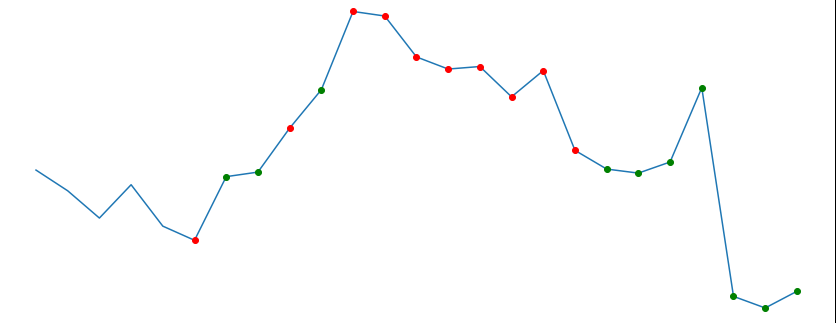

**200K epochs on default dataset**

**300K epochs on default dataset**

**400K epochs on default dataset**

**500K epochs on default dataset**

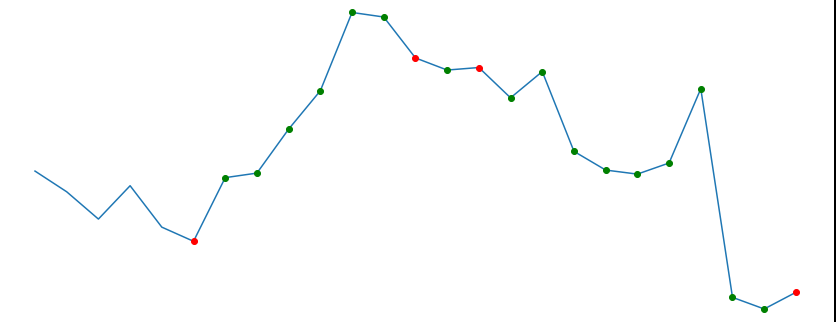